# 1. Import Libraries

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time
import datetime
import pytz
import IPython
#import keras_tuner as kt

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from pandas import DataFrame

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
print('TF version:', tf.__version__)
print('GPU devices:', tf.config.list_physical_devices('GPU'))

TF version: 2.8.2
GPU devices: []


# 2. Load Data

In [ ]:
# columns used 
columns = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']

# importing the dataset
income = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                   header=None,
                   names=columns)
#income.head()

In [ ]:
income.info()

In [ ]:
income.to_csv("raw_data.csv",index=False)

In [ ]:
from sklearn.utils import shuffle
df = shuffle(income.values)
X = df[:,0:4]
Y = df[:,4]


In [ ]:
...
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)


# 3. Better Learning

In [ ]:
# study of mlp learning curves given different number of nodes for multi-class classification
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
def create_dataset():
  """ prepare multi-class classification dataset 
  generating a 2d classification dataset

  Args:

  Return:
    dataset split into train_x, train_y, test_x, test_y
  """
	
  # split into train and test
  n_train = 105
  train_x, test_x = X[:n_train, :], X[n_train:, :]
  train_y, test_y = dummy_y[:n_train], dummy_y[n_train:]

  # format adjust
  train_x = np.asarray(train_x).astype(np.float32)
  train_y = np.asarray(train_y).astype(np.float32)
  test_x = np.asarray(test_x).astype(np.float32)
  test_y = np.asarray(test_y).astype(np.float32)
	
  return train_x, train_y, test_x, test_y

## 3.1 Change model capacity with nodes and layers

### 3.1.1 Change model capacity with nodes

In [ ]:
def evaluate_model(n_nodes, train_x, train_y, test_x, test_y):
  """ fit model with given number of nodes
  Args:
    n_nodes: number of nodes
    train_x: training features
    train_y: training target
    test_x: test features
    test_y: test target

  Return:
    test set accuracy generating a 2d classification dataset
  """
  
  # configure the model based on the data
  n_input, n_classes = train_x.shape[1], test_y.shape[1]
	
  # define model
  model = Sequential()
  model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(n_classes, activation='softmax'))

  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  # fit model on train set
  history = model.fit(train_x, train_y, epochs=200, verbose=0)

  # evaluate model on test set
  _, test_acc = model.evaluate(test_x, test_y, verbose=0)
  return history, test_acc

nodes=1: 0.267
nodes=2: 0.933
nodes=3: 0.600
nodes=4: 0.911
nodes=5: 0.978
nodes=6: 0.956
nodes=7: 0.978


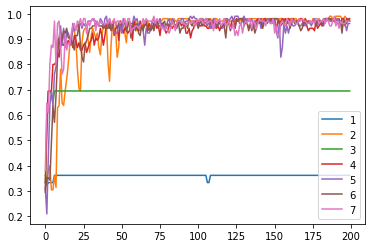

In [ ]:
# prepare dataset
train_x, train_y, test_x, test_y = create_dataset()


# evaluate model and plot learning curve with given number of nodes
num_nodes = [1, 2, 3, 4, 5, 6, 7]


for n_nodes in num_nodes:
	# evaluate model with a given number of nodes
	history, result = evaluate_model(n_nodes, train_x, train_y, test_x, test_y)
 
	# summarize final test set accuracy
	print('nodes=%d: %.3f' % (n_nodes, result))
 
	# plot learning curve
	plt.plot(history.history['accuracy'], label=str(n_nodes))
# show the plot
plt.legend()
plt.show()

### 3.1.2 Change model capacity with layers

In [ ]:
def evaluate_model2(n_layers, train_x, train_y, test_x, test_y):
  """ fit model with given number of nodes
  Args:
    n_layers: number of layers
    train_x: training features
    train_y: training target
    test_x: test features
    test_y: test target

  Return:
    test set accuracy generating a 2d classification dataset
  """
  
  # configure the model based on the data
  n_input, n_classes = train_x.shape[1], test_y.shape[1]

  # define model
  model = Sequential()
  model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))

  for _ in range(1, n_layers):
    model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))

  model.add(Dense(n_classes, activation='softmax'))

  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  # fit model
  history = model.fit(train_x, train_y, epochs=200, verbose=0)

  # evaluate model on test set
  _, test_acc = model.evaluate(test_x, test_y, verbose=0)
  return history, test_acc

layers=1: 0.933
layers=2: 0.978
layers=3: 0.956
layers=4: 1.000
layers=5: 0.978


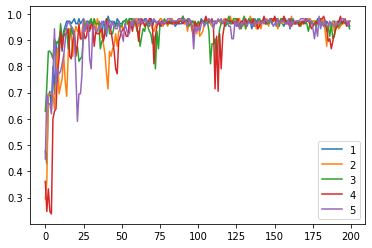

In [ ]:
# get dataset
train_x, train_y, test_x, test_y = create_dataset()


# evaluate model and plot learning curve of model with given number of layers
all_history = list()
num_layers = [1, 2, 3, 4, 5]

for n_layers in num_layers:
	# evaluate model with a given number of layers
	history, result = evaluate_model2(n_layers, train_x, train_y, test_x, test_y)
	print('layers=%d: %.3f' % (n_layers, result))
	# plot learning curve
	plt.plot(history.history['accuracy'], label=str(n_layers))
plt.legend()
plt.show()  

## 3.2 Effect of Learning Rate and Momentum

In [ ]:
def prepare_data():
	# generate 2d classification dataset
  income = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                   header=None,
                   names=columns)

  from sklearn.utils import shuffle
  df = shuffle(income.values)
  X = df[:,0:4]
  Y = df[:,4]
	
  # encode class values as integers
  encoder = LabelEncoder()
  encoder.fit(Y)
  encoded_Y = encoder.transform(Y)
  # convert integers to dummy variables (i.e. one hot encoded)
  dummy_y = np_utils.to_categorical(encoded_Y)
	
  # split into train and test
  n_train = 105
  train_x, test_x = X[:n_train, :], X[n_train:, :]
  train_y, test_y = dummy_y[:n_train], dummy_y[n_train:]

  train_x = np.asarray(train_x).astype(np.float32)
  train_y = np.asarray(train_y).astype(np.float32)
  test_x = np.asarray(test_x).astype(np.float32)
  test_y = np.asarray(test_y).astype(np.float32)

  return train_x, train_y, test_x, test_y

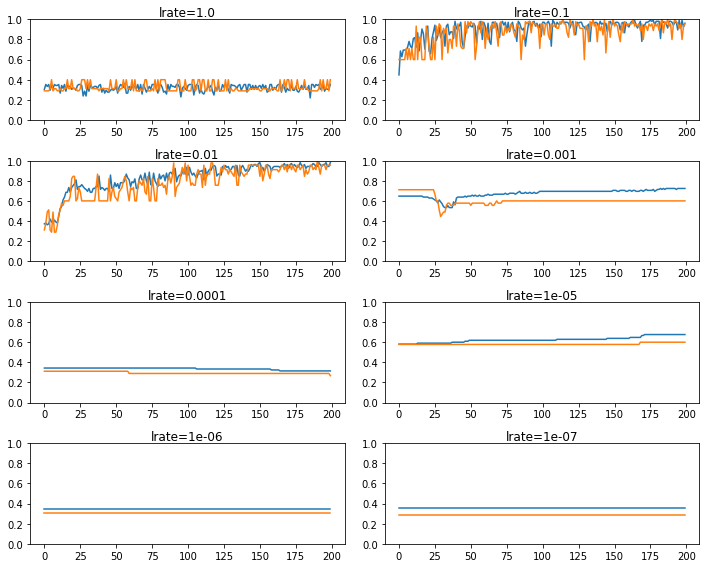

In [ ]:
# fit a model and plot learning curve
def fit_model(train_x, train_y, test_x, test_y, lrate):
	# define model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
 
	# compile model
	opt = SGD(learning_rate=lrate)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
 
	# fit model
	history = model.fit(train_x, train_y,
                     validation_data=(test_x, test_y),
                     epochs=200, verbose=0)
 
	# plot learning curves
	plt.plot(history.history['accuracy'], label='train')
	plt.plot(history.history['val_accuracy'], label='test')
	plt.title('lrate='+str(lrate), pad=-50)

# prepare dataset
train_x, train_y, test_x, test_y = prepare_data()

# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

# create a figure
fig = plt.figure(figsize=(10, 8))

for i in range(len(learning_rates)):
	# determine the plot number
	plot_no = 420 + (i+1)
	fig.add_subplot(plot_no,ylim=(0,1))
 
	# fit model and plot learning curves for a learning rate
	fit_model(train_x, train_y, test_x, test_y, learning_rates[i])
 
# show learning curves
plt.tight_layout()
plt.show()